In [1]:
# Import necessary libraries
from minisom import MiniSom
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Load Iris dataset
iris = load_iris()
features = iris.data
labels = iris.target

In [3]:

# Scale features
sc = MinMaxScaler(feature_range=(0,1))
features = sc.fit_transform(features)

In [4]:
# Define parameters
sigma = 1.5
lr = 0.5
n_features = features.shape[1]
n_samples = features.shape[0]

In [5]:
# Calculate map size
map_size = 5 * math.sqrt(n_samples)
map_height = map_width = math.ceil(math.sqrt(map_size))

In [6]:
# Print map dimensions and number of features
print(f'(map_height, map_width) = ({map_height}, {map_width})')
print(f'Number of features: {n_features}')


(map_height, map_width) = (8, 8)
Number of features: 4


In [7]:
# Initialize SOM
som = MiniSom(x=map_height, y=map_width, input_len=n_features, sigma=sigma, learning_rate=lr,
              neighborhood_function='gaussian', random_seed=123)

In [8]:
# Initialize weights using PCA and train SOM
som.pca_weights_init(features)
som.train(data=features, num_iteration=1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.07162916380167021


In [9]:
# Print distance map and activation frequencies
print('-------------\nDistance Map\n------------')
print(f'Shape: {som.distance_map().shape}')
print(f'First Line: {som.distance_map().T[0]}')
frequencies = som.activation_response(features)
print(f'Frequencies:\n {np.array(frequencies, np.uint)}')

-------------
Distance Map
------------
Shape: (8, 8)
First Line: [0.15035201 0.57473771 0.6689081  0.30278895 0.28668717 0.37241133
 0.4030375  0.25343719]
Frequencies:
 [[4 4 1 5 4 3 3 4]
 [3 2 2 2 2 2 4 1]
 [0 0 0 0 0 0 3 0]
 [5 3 4 1 3 3 0 1]
 [2 2 1 2 2 3 2 3]
 [4 1 4 5 0 1 3 0]
 [4 3 3 0 4 1 1 2]
 [3 5 5 3 4 4 3 1]]


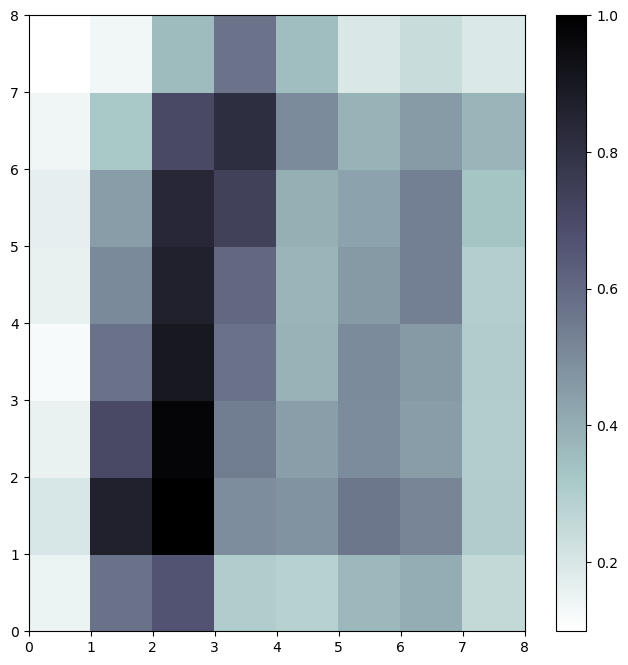

In [10]:
# Plot U-matrix
plt.figure(figsize=(map_height, map_width))
u_matrix = som.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar()

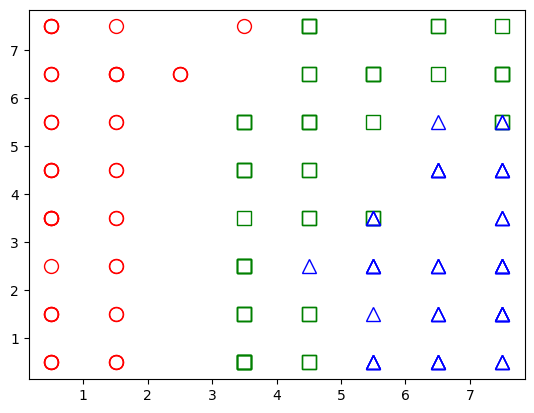

In [11]:
# Plot markers for different species
markers = ['o', 's', '^']   # 'setosa', 'versicolor' 'virginica'
colors = ['r', 'g', 'b']
for feature, label in zip(features, labels):
    w = som.winner(feature)
    plt.plot(w[0] + 0.5, w[1] + 0.5,
        markers[label], markeredgecolor = colors[label],
        markerfacecolor = 'None', markersize = 10, markeredgewidth = 1)

plt.show()

In [12]:
# Define functions for plotting
def plot_distance_map(ax, fig):
    """Plot the distance map"""
    p = ax.pcolor(som.distance_map().T, cmap='bone_r')
    fig.colorbar(p, ax=ax)

def plot_clusters_scatter(ax):
    """
    Create a scatter plot of the winning neurons.
    Each neuron is assigned the color of the cluster it belongs to.
    """
    winning_neurons = np.array([som.winner(x) for x in features])
    offset = np.random.uniform(low=-0.4, high=0.4, size=(len(features), 2))
    winning_neurons = winning_neurons + offset
    colors = ['#ff0400', 'g', '#e88325']
    label_colors = [colors[label] for label in labels]
    ax.scatter(winning_neurons[:,0], winning_neurons[:,1], s=10, c=label_colors)

def plot_clusters_markers(ax):
    """
    Plot the winning neurons as markers.
    Each marker is assigned the color of the cluster ir belongs to.
    """
    markers = ['o', 's', '^']
    colors = ['#ff0400', 'g', '#e88325']
    for i, feature in enumerate(features):
        w = som.winner(feature)
        ax.plot(w[0] + 0.5, w[1] + 0.5,
            markers[labels[i]], markeredgecolor = colors[labels[i]],
            markerfacecolor = 'None', markersize = 10, markeredgewidth = 1)
    ax.legend(handles=[plt.Line2D([], [], color='#ff0400', marker='o', linestyle='None', label='Setosa'),
                    plt.Line2D([], [], color='green', marker='s', linestyle='None', label='Versicolor'),
                    plt.Line2D([], [], color='#e88325', marker='^', linestyle='None', label='Virginica')],
                    bbox_to_anchor=(1.5, 1.03))

<function matplotlib.pyplot.suptitle(t: 'str', **kwargs) -> 'Text'>

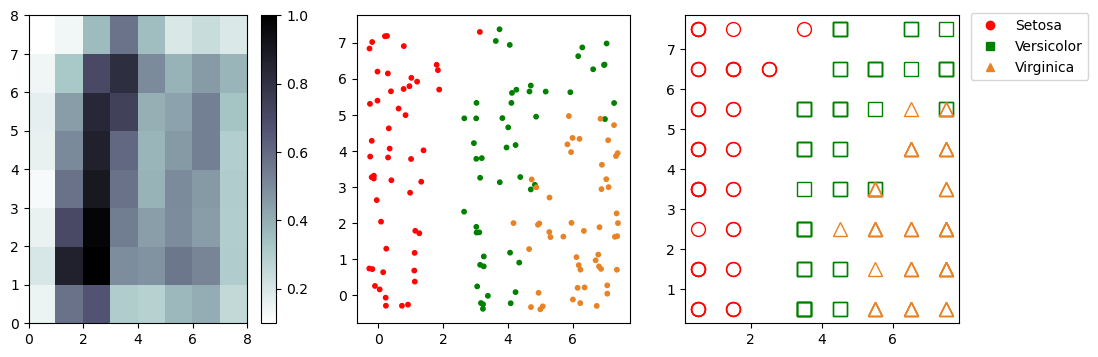

In [14]:
# Create subplots for plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot distance map
plot_distance_map(axes[0], fig)

# Plot clusters using scatter plot
plot_clusters_scatter(axes[1])

# Plot clusters using markers
plot_clusters_markers(axes[2])

# Set title
plt.suptitle

<Figure size 640x480 with 0 Axes>

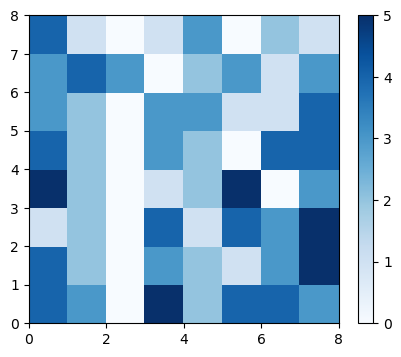

In [16]:
plt.suptitle("Plants species clusters")
plt.show()

# Plot activation frequencies
plt.figure(figsize=(5, 4))
frequencies = som.activation_response(features)
plt.pcolor(frequencies.T, cmap='Blues')
plt.colorbar()
plt.show()
